In [2]:
from datetime import datetime

import numpy as np
import pandas as pd
from finsim.portfolio import DynamicPortfolioWithDividends
from matplotlib import pyplot as plt

In [1]:
from plotnine import ggplot, aes, geom_line, theme, element_text, scale_x_datetime, labs
from mizani.breaks import date_breaks

In [3]:
def get_optimal_daybreaks(startdate, enddate):
    timediff = datetime.strptime(enddate, '%Y-%m-%d') - datetime.strptime(startdate, '%Y-%m-%d')
    nbdaysdiff = timediff.days
    if nbdaysdiff > 730:
        return '1 year'
    elif nbdaysdiff > 365:
        return '3 months'
    elif nbdaysdiff > 30:
        return '1 month'
    else:
        return '1 day'

In [19]:
symbols_nbshares = {'VOO':1, 'QQQ': 1}
startdate = '2022-09-01'
enddate = '2023-02-17'

In [20]:
portfolio = DynamicPortfolioWithDividends(symbols_nbshares, startdate)
portfolio.move_cursor_to_date(enddate)

In [21]:
worthdf = portfolio.get_portfolio_values_overtime(startdate, enddate)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [22]:
worthdf.head()

,TimeStamp,stock_value,dividend,cash,value
0,2022-09-01,663.669983,0.0,0.0,663.669983
1,2022-09-02,655.620026,0.0,0.0,655.620026
2,2022-09-06,652.289978,0.0,0.0,652.289978
3,2022-09-07,664.649994,0.0,0.0,664.649994
4,2022-09-08,668.589996,0.0,0.0,668.589996


In [23]:
plotdf = pd.concat([
    pd.DataFrame({
    'TimeStamp': worthdf['TimeStamp'], 
    'value': worthdf['stock_value'], 
    'plot': 'stock price'}),
    pd.DataFrame({
        'TimeStamp': worthdf['TimeStamp'],
        'value': worthdf['value'],
        'plot': 'stock price+dividend'
    })
])

In [24]:
plotdf

,TimeStamp,value,plot
0,2022-09-01,663.669983,stock price
1,2022-09-02,655.620026,stock price
2,2022-09-06,652.289978,stock price
3,2022-09-07,664.649994,stock price
4,2022-09-08,668.589996,stock price
...,...,...,...
112,2023-02-13,688.165006,stock price+dividend
113,2023-02-14,690.274991,stock price+dividend
114,2023-02-15,693.895017,stock price+dividend
115,2023-02-16,682.804990,stock price+dividend


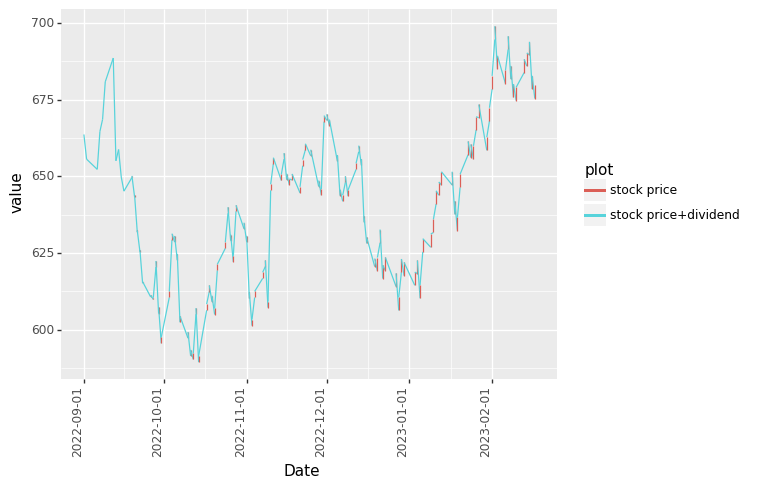

<ggplot: (8770998339057)>

In [25]:
plt = (ggplot(plotdf)
 + geom_line(aes('TimeStamp', 'value', color='plot', group=1))
 + theme(axis_text_x=element_text(rotation=90, hjust=1))
 + scale_x_datetime(breaks=date_breaks(get_optimal_daybreaks(startdate, enddate)))
 + labs(x='Date', y='value')
)
plt

In [51]:
plt.save('plot.png')

/Users/stephenhky/opt/anaconda3/envs/finance/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/stephenhky/opt/anaconda3/envs/finance/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: plot.png


In [52]:
import plotnine
plotnine.__version__

'0.10.1'